In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
input_dir = 'inputs/'
output_dir = 'outputs/'

In [3]:
filtered_counts = pd.read_csv(os.path.join(input_dir, "counts_filtered.csv"), index_col=0)
print(filtered_counts.shape)
filtered_counts.head()

(5069, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000033845,2,1,2,2,0,4,0,1,4,0,...,1,0,1,0,4,0,2,3,0,3
ENSMUSG00000025903,2,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,3,0,0,3
ENSMUSG00000033813,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,2,0,1
ENSMUSG00000033793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000061024,0,2,0,2,2,0,0,0,2,0,...,1,0,1,0,0,0,1,1,2,0


**First we will scale the counts for sequencing depth**

Do we need a length normalization here? Why or why not? 

Scaling for sequencing depth: Divide each count by the total reads in that libary and multiply by some scaling factor (so we aren't dealing with tiny tiny numbers). In this case, we will use 10000 as the scaling factor. 

In [4]:
#Use sum to get the total sequencing depth per cell

filtered_counts.sum().head()

AAACATTGTTTGGG-1    6522
AAACCGTGCCAAGT-1    3124
AAACGCACAGCCTA-1    8209
AAACGCACCAGATC-1    9067
AAACGCACCGCCTT-1    7324
dtype: int64

In [5]:
((filtered_counts/filtered_counts.sum())*10000).head()

,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000033845,3.066544,3.201024,2.43635,2.205801,0.000000,4.415986,0.0,1.717623,2.848191,0.0,...,1.215214,0.0,1.450116,0.0,15.249714,0.000000,2.724053,3.112033,0.000000,8.826125
ENSMUSG00000025903,3.066544,0.000000,0.00000,1.102901,0.000000,0.000000,0.0,0.000000,0.712048,0.0,...,0.000000,0.0,1.450116,0.0,0.000000,0.000000,4.086080,0.000000,0.000000,8.826125
ENSMUSG00000033813,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.712048,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,7.256894,0.000000,2.074689,0.000000,2.942042
ENSMUSG00000033793,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000061024,0.000000,6.402049,0.00000,2.205801,2.730748,0.000000,0.0,0.000000,1.424096,0.0,...,1.215214,0.0,1.450116,0.0,0.000000,0.000000,1.362027,1.037344,9.460738,0.000000


In [6]:
#Save this output to a new dataframe that we will call scaled_counts
scaled_counts = (filtered_counts/filtered_counts.sum())*10000

#Do we have the number of rows and column that are expected?? 
#Always look at the shape and head when you make a new dataframe.
print(scaled_counts.shape)
scaled_counts.head()

(5069, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000033845,3.066544,3.201024,2.43635,2.205801,0.000000,4.415986,0.0,1.717623,2.848191,0.0,...,1.215214,0.0,1.450116,0.0,15.249714,0.000000,2.724053,3.112033,0.000000,8.826125
ENSMUSG00000025903,3.066544,0.000000,0.00000,1.102901,0.000000,0.000000,0.0,0.000000,0.712048,0.0,...,0.000000,0.0,1.450116,0.0,0.000000,0.000000,4.086080,0.000000,0.000000,8.826125
ENSMUSG00000033813,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.712048,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,7.256894,0.000000,2.074689,0.000000,2.942042
ENSMUSG00000033793,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSMUSG00000061024,0.000000,6.402049,0.00000,2.205801,2.730748,0.000000,0.0,0.000000,1.424096,0.0,...,1.215214,0.0,1.450116,0.0,0.000000,0.000000,1.362027,1.037344,9.460738,0.000000


The sum of all the values in all the columns should now be the same. Are they? 

In [7]:
scaled_counts.sum().head()

AAACATTGTTTGGG-1    10000.0
AAACCGTGCCAAGT-1    10000.0
AAACGCACAGCCTA-1    10000.0
AAACGCACCAGATC-1    10000.0
AAACGCACCGCCTT-1    10000.0
dtype: float64

**Select only variable genes for analysis**

Variation in gene expression is correlated with mean expression level of a gene. We are going to calculate the squared coefficient of variation and compare that the mean expression level in log space. To select genes that are varying in this dataset, we will pick the genes that fall off the linear regression line. See more details [here](https://www.nature.com/articles/nmeth.2645).

.var is a pandas function that will calculate the coefficient of variation across either the row or column of the dataframe (set by the axis). In python ** is equavalent to "to the power of". Or in our case, squared. Use the log10 function in numpy to convert the result into log10 space. Save this output as variation. Take a look at the result.

In [8]:
variation = np.log10(scaled_counts.var(axis=1)**2)
variation.head()

ENSMUSG00000033845    1.987445
ENSMUSG00000025903    1.792370
ENSMUSG00000033813    0.499707
ENSMUSG00000033793    0.131498
ENSMUSG00000061024    0.552029
dtype: float64

In [9]:
means = np.log10(scaled_counts.mean(axis=1))
means.head()

ENSMUSG00000033845    0.357597
ENSMUSG00000025903   -0.023377
ENSMUSG00000033813   -0.262189
ENSMUSG00000033793   -0.500985
ENSMUSG00000061024   -0.319073
dtype: float64

We are going to put these results back into a dataframe for ease of plotting. 

In [10]:
var_df = pd.DataFrame([variation,means]).T
var_df.head()

,0,1
ENSMUSG00000033845,1.987445,0.357597
ENSMUSG00000025903,1.792370,-0.023377
ENSMUSG00000033813,0.499707,-0.262189
ENSMUSG00000033793,0.131498,-0.500985
ENSMUSG00000061024,0.552029,-0.319073


Let's change the column names to something useful. 

In [11]:
#inplace=True will save the changes to the dataframe being operated on
#rather than having to start your command with new_df = 

var_df.rename(columns = {0:"variance",1:"mean"}, inplace=True)
var_df.head()

,variance,mean
ENSMUSG00000033845,1.987445,0.357597
ENSMUSG00000025903,1.792370,-0.023377
ENSMUSG00000033813,0.499707,-0.262189
ENSMUSG00000033793,0.131498,-0.500985
ENSMUSG00000061024,0.552029,-0.319073


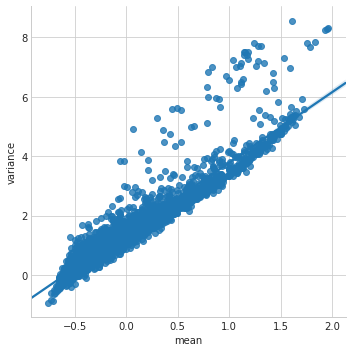

In [12]:
sns.set_style("whitegrid")

sns.lmplot('mean','variance',var_df)

We will use the stats module loaded from scipy to calculate the linear regression line for this data. Take a look at the result. It is a list of values.

In [13]:
result = stats.linregress(var_df['mean'], var_df['variance'])
result

LinregressResult(slope=2.3662876643061552, intercept=1.419639781746865, rvalue=0.9425087872450082, pvalue=0.0, stderr=0.011786609919084274)

To grab the values we are interested in (slope and y intercept), select the values out of the list. The slope is stored in the first value (position 0) and yintercept is the second value (position 1). Print the values you found to make sure they match the result you see above. 

In [14]:
slope = result[0]
yint = result[1]
print(slope)
print(yint)

2.3662876643061552
1.419639781746865


To determine which genes have a variation that is greater than we would expect, we first need to calculate what we expect for each gene. Back to simple algebra: y=mx+b

In [15]:
var_df['expected'] = var_df['mean']*slope + yint
var_df.head()

,variance,mean,expected
ENSMUSG00000033845,1.987445,0.357597,2.265818
ENSMUSG00000025903,1.792370,-0.023377,1.364324
ENSMUSG00000033813,0.499707,-0.262189,0.799226
ENSMUSG00000033793,0.131498,-0.500985,0.234164
ENSMUSG00000061024,0.552029,-0.319073,0.664620


Let's grab genes with a variance >0.25 more than the expected value and plot these with a different color. We will create another column in the dataframe with a True/False result if the gene passes our criteria

In [16]:
var_df['sig'] = (var_df['variance'] - var_df['expected']) > 0.25
var_df.head()

,variance,mean,expected,sig
ENSMUSG00000033845,1.987445,0.357597,2.265818,False
ENSMUSG00000025903,1.792370,-0.023377,1.364324,True
ENSMUSG00000033813,0.499707,-0.262189,0.799226,False
ENSMUSG00000033793,0.131498,-0.500985,0.234164,False
ENSMUSG00000061024,0.552029,-0.319073,0.664620,False


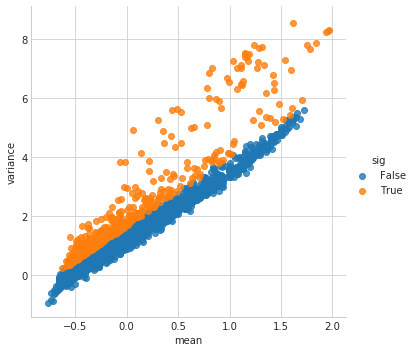

In [17]:
sns.lmplot('mean','variance',var_df, hue='sig', fit_reg=False)

Let's get a list of variable genes so we can subset the dataframe for only those genes. 

First, we will ask the question: which rows have a value in the column 'sig' == True:

In [18]:
(var_df['sig'] == True).head()

ENSMUSG00000033845    False
ENSMUSG00000025903     True
ENSMUSG00000033813    False
ENSMUSG00000033793    False
ENSMUSG00000061024    False
Name: sig, dtype: bool

Look familiar? We have a boolean of True/False with gene names (dataframe index). Subset the counts dataframe with .loc

In [19]:
variable_scaled_counts = scaled_counts.loc[var_df['sig'] == True]
print(variable_scaled_counts.shape)
variable_scaled_counts.head()

(577, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000025903,3.066544,0.0,0.0,1.102901,0.000000,0.000000,0.000000,0.0,0.712048,0.000000,...,0.000000,0.0,1.450116,0.0,0.000000,0.0,4.08608,0.000000,0.000000,8.826125
ENSMUSG00000026126,0.000000,0.0,0.0,3.308702,0.000000,0.000000,0.000000,0.0,0.712048,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,14.191107,0.000000
ENSMUSG00000037503,3.066544,0.0,0.0,0.000000,1.365374,3.311989,1.595405,0.0,0.000000,3.510004,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
ENSMUSG00000010453,0.000000,0.0,0.0,0.000000,0.000000,0.000000,3.190810,0.0,0.712048,0.000000,...,0.000000,0.0,0.000000,0.0,11.437286,0.0,0.00000,1.037344,0.000000,0.000000
ENSMUSG00000048234,0.000000,0.0,0.0,0.000000,1.365374,0.000000,0.000000,0.0,0.712048,0.000000,...,1.215214,0.0,0.000000,0.0,0.000000,0.0,4.08608,1.037344,0.000000,0.000000


**Convert scaled counts into z-scores**

Lastly, we will calculate the zscore of each gene across the rows to use as input for clustering and dimensionality reduction. 

In [20]:
stats.zscore(variable_scaled_counts, axis=1)

array([[ 0.75536808, -0.33780177, -0.33780177, ..., -0.33780177,
        -0.33780177,  2.80855913],
       [-0.33299075, -0.33299075, -0.33299075, ..., -0.33299075,
         4.69245506, -0.33299075],
       [ 1.17253427, -0.31494257, -0.31494257, ..., -0.31494257,
        -0.31494257, -0.31494257],
       ...,
       [-0.45590606, -0.08500393, -0.6148642 , ..., -0.35331412,
         0.64893342, -0.16580141],
       [-0.27761002,  0.40628781, -0.47099942, ..., -0.16431632,
        -0.59845351,  2.17190119],
       [-0.44621084, -0.3290246 , -0.54728089, ..., -0.32935567,
         0.99766035,  0.11554546]])

The output of this is an array, so let's put this back into a dataframe with the appropriate row and column labels

In [21]:
zscore_array = stats.zscore(variable_scaled_counts, axis=1)

zscore_variable_genes = pd.DataFrame(zscore_array, index = variable_scaled_counts.index)
zscore_variable_genes.columns = variable_scaled_counts.columns
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(577, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000025903,0.755368,-0.337802,-0.337802,0.055363,-0.337802,-0.337802,-0.337802,-0.337802,-0.083969,-0.337802,...,-0.337802,-0.337802,0.179139,-0.337802,-0.337802,-0.337802,1.118815,-0.337802,-0.337802,2.808559
ENSMUSG00000026126,-0.332991,-0.332991,-0.332991,0.838708,-0.332991,-0.332991,-0.332991,-0.332991,-0.080836,-0.332991,...,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,-0.332991,4.692455,-0.332991
ENSMUSG00000037503,1.172534,-0.314943,-0.314943,-0.314943,0.347354,1.291592,0.458935,-0.314943,-0.314943,1.387641,...,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943,-0.314943
ENSMUSG00000010453,-0.303060,-0.303060,-0.303060,-0.303060,-0.303060,-0.303060,1.366492,-0.303060,0.069510,-0.303060,...,-0.303060,-0.303060,-0.303060,-0.303060,5.681360,-0.303060,-0.303060,0.239717,-0.303060,-0.303060
ENSMUSG00000048234,-0.344640,-0.344640,-0.344640,-0.344640,0.233700,-0.344640,-0.344640,-0.344640,-0.043034,-0.344640,...,0.170096,-0.344640,-0.344640,-0.344640,-0.344640,-0.344640,1.386125,0.094754,-0.344640,-0.344640


**Save this dataframe**

In [22]:
zscore_variable_genes.to_csv(os.path.join(output_dir, "zscore_variable_genes.csv"))